In [1]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filelist = []
FL2 = []
for file in os.listdir("."):
    if file[-8:] == "datatime":
        filelist.append(file)
    elif file[:7] == "subject":
        FL2.append(file)
filelist.sort()
FL2.sort()
print(FL2)

['subject002', 'subject003', 'subject004', 'subject005', 'subject006', 'subject007', 'subject008', 'subject009']


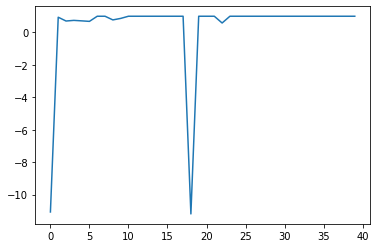

In [3]:
def read_result(path):
    assert(path.split('_')[-3] == "result")
    f=open(path)
    reader=csv.reader(f)
    
    scores = []
    for row in reader:
        scores.append(float(row[0]))
    return scores

scores = read_result("/home/ubuntu/Projects/merging-gym/scripts/data/subject005/005_result_Formal_L0")
plt.figure()
plt.plot(scores)

In [4]:
scores = read_result("/home/ubuntu/Projects/merging-gym/scripts/data/subject005/005_result_Formal_L0")
x, y = [], []
for i in range(40):
    if scores[i] < -8:
        continue
    x.append(i)
    y.append(scores[i])
# plt.plot(x, y, label=filename[:3])


In [5]:
group = {"Pre_low":10, "Pre_L2":10, "Formal_L1":40, "Formal_high":40, "Formal_L0":40}
formal_list = ["Formal_L0", "Formal_L1", "Formal_high"]

N_tag = len(formal_list)
N_player = len(FL2)

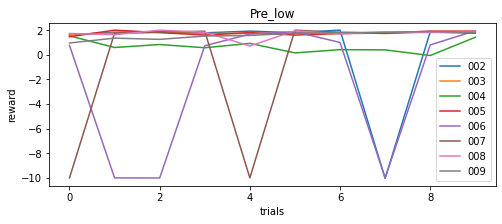

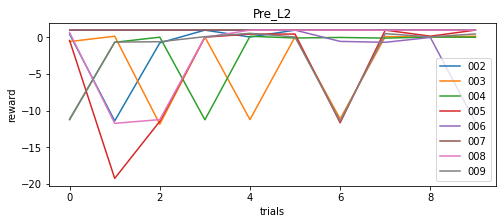

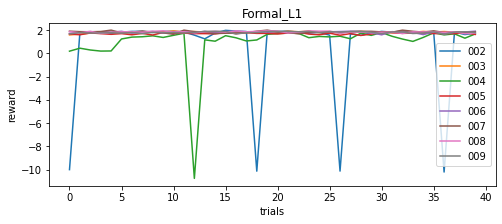

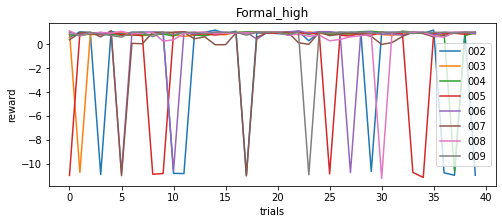

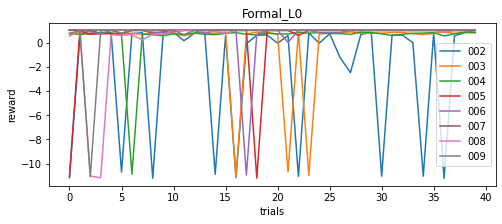

In [6]:

# tag = "result"
# strategy = "Pre_low"
def plot_result(strategy):
    plt.figure(figsize=(8, 3))
#     plt.ylim(0, 2)
    plt.title(strategy)

    for player in FL2:
        for filename in sorted(os.listdir(player)):
            if len(filename.split("_")) < 2 or filename.split("_")[1] != "result":
                continue
            if filename.split('_')[2] + '_' + filename.split('_')[3] != strategy:
                continue
#             print(filename)

            scores = read_result(os.path.join(player, filename))

            x, y = [], []
            for i in range(len(scores)):
#                 if scores[i] < -8:
#                     continue
                x.append(i)
                y.append(scores[i])
            
            plt.plot(x, y, label=filename[:3])
    plt.ylabel("reward")
    plt.xlabel("trials")
    plt.legend()

for gn in group:
    plot_result(gn)

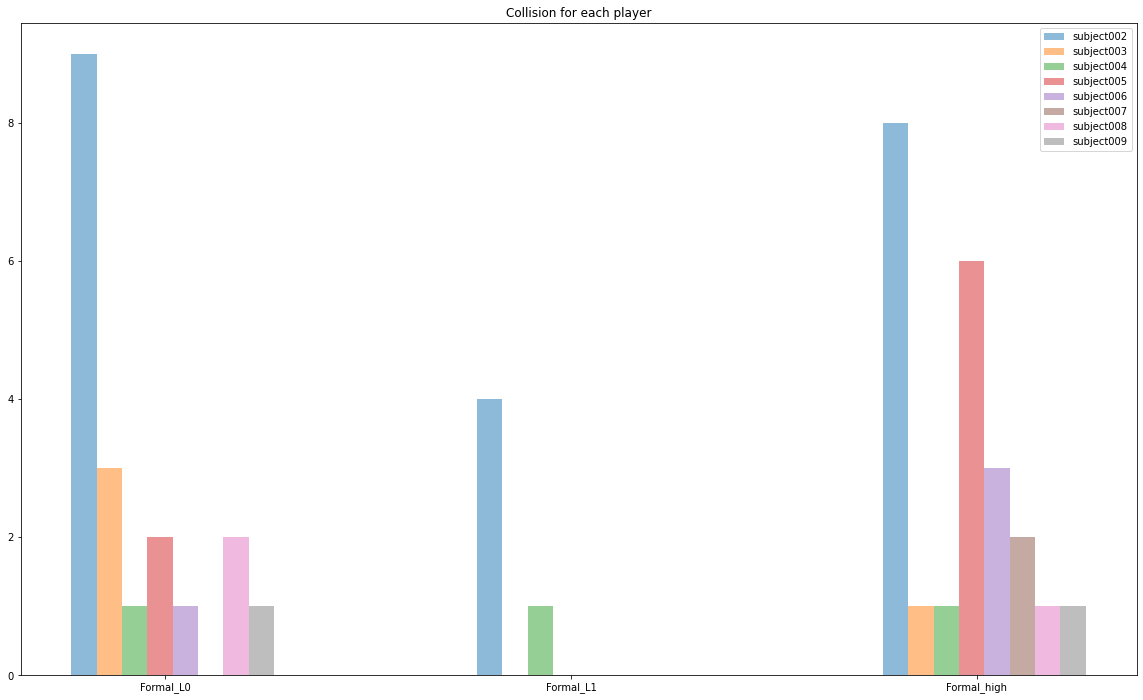

In [7]:
def plot_collision():
    N_player = len(FL2)
    fig = plt.figure(figsize=(20, 12))
#     plt.ylim(0, 2)
#     plt.title(strategy)

    for pid in range(len(FL2)):
        player = FL2[pid]
        
        collision = {}
        for l in formal_list:
            collision[l] = 0
            
        for filename in sorted(os.listdir(player)):
            if len(filename.split("_")) < 2 or filename.split("_")[1] != "result":
                continue
                
            tag = filename.split('_')[2] + '_' + filename.split('_')[3]
            if tag not in collision:
                continue
                
            scores = read_result(os.path.join(player, filename))

            for i in range(len(scores)):
                if scores[i] < -7:
                    collision[tag] += 1
                    
        plt.title("Collision for each player")
        plt.bar(x=[pid/N_player/2, 1+pid/N_player/2, 2+pid/N_player/2], height=collision.values(), width=1/N_player/2, alpha=0.5, label=player)
    
    plt.xticks([0.2,1.2,2.2], collision.keys())
    plt.legend()
    
plot_collision()

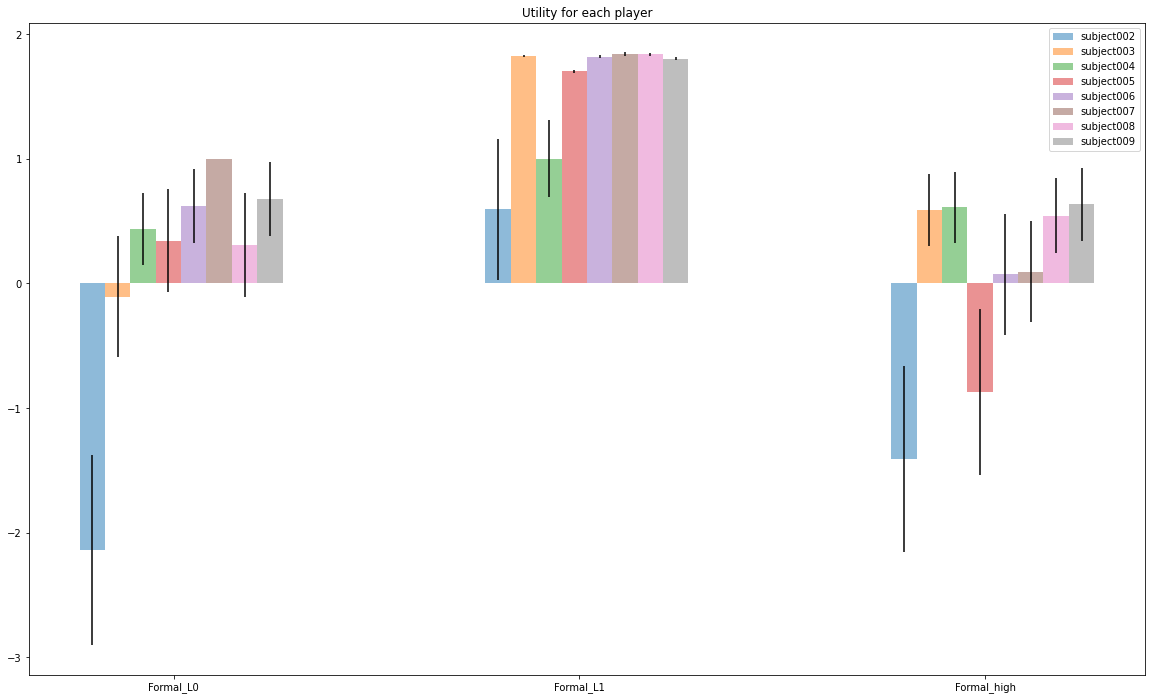

In [8]:
def plot_utility():
    N_player = len(FL2)
    fig = plt.figure(figsize=(20, 12))

    for pid in range(len(FL2)):
        player = FL2[pid]
        
        utility = {}
        for l in formal_list:
            utility[l] = []
            
        for filename in sorted(os.listdir(player)):
            if len(filename.split("_")) < 2 or filename.split("_")[1] != "result":
                continue
                
            tag = filename.split('_')[2] + '_' + filename.split('_')[3]
            if tag not in utility:
                continue
                
            scores = read_result(os.path.join(player, filename))
            utility[tag] = np.array(scores)
            
        x=[pid/N_player/2, 1+pid/N_player/2, 2+pid/N_player/2]
        height=[utility[formal_list[i]].mean() for i in range(len(formal_list))]
        yerr=[utility[formal_list[i]].std() / np.sqrt(40) for i in range(len(formal_list))]

        plt.bar(x=x, height=height, yerr=yerr, width=1/N_player/2, alpha=0.5, label=player)

                                                                                
    
    plt.title("Utility for each player")
    plt.xticks([0.2,1.2,2.2], utility.keys())
    plt.legend()
    
plot_utility()

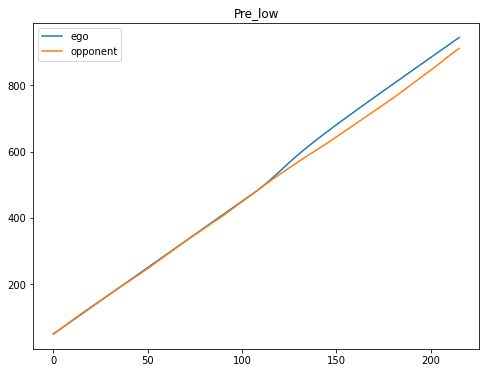

In [9]:
def read_csv(csv_path):
    f=open(csv_path)
    reader=csv.reader(f)

    dx1, dy1, dv1, rx1, v1 = [], [], [], [], []
    dx2, dy2, dv2, rx2, v2 = [], [], [], [], []
    action1, action2, reward1, reward2 = [], [], [], []

    for row in reader:
        if row[0] == "x2 - x1":
            continue
    #     print(row)  #数组下标是以0开始的
        dx1.append(float(row[0]))
        dy1.append(float(row[1])) 
        dv1.append(float(row[2])) 
        rx1.append(float(row[3])) 
        v1.append(float(row[4]))

        dx2.append(float(row[5]))
        dy2.append(float(row[6])) 
        dv2.append(float(row[7])) 
        rx2.append(float(row[8])) 
        v2.append(float(row[9]))

        action1.append(float(row[10]))
        action2.append(float(row[11]))
        reward1.append(float(row[12]))
        reward2.append(float(row[13]))

    return dx1, dy1, dv1, rx1, v1, dx2, dy2, dv2, rx2, v2, action1, action2, reward1, reward2

def plot_speed(v1, v2, title):
    plt.figure(figsize=(8,6))
    plt.title(title)

    plt.plot(v1, label="ego")
    plt.plot(v2, label="opponent")
    plt.legend()

    
load_path = "subject002_datatime/2022--04--01 13:27:11/episode1 Pre_low"
# load_path = os.path.join(player, time, filename)  
dx1, dy1, dv1, rx1, v1, dx2, dy2, dv2, rx2, v2, action1, action2, reward1, reward2 = read_csv(load_path)

x1 = 950-np.array(rx1)
x2 = 950-np.array(rx2)
plot_speed(x1, x2, load_path.split(' ')[-1])

subject002_datatime Formal_L0
subject002_datatime Formal_L1
subject002_datatime Formal_high
subject003_datatime Formal_L0
subject003_datatime Formal_L1
subject003_datatime Formal_high
subject004_datatime Formal_L0
subject004_datatime Formal_L1
subject004_datatime Formal_high
subject005_datatime Formal_L0
subject005_datatime Formal_L1
subject005_datatime Formal_high
subject006_datatime Formal_L0
subject006_datatime Formal_L1
subject006_datatime Formal_high
subject007_datatime Formal_L0
subject007_datatime Formal_L1
subject007_datatime Formal_high
subject008_datatime Formal_L0
subject008_datatime Formal_L1
subject008_datatime Formal_high
subject009_datatime Formal_L0
subject009_datatime Formal_L1
subject009_datatime Formal_high


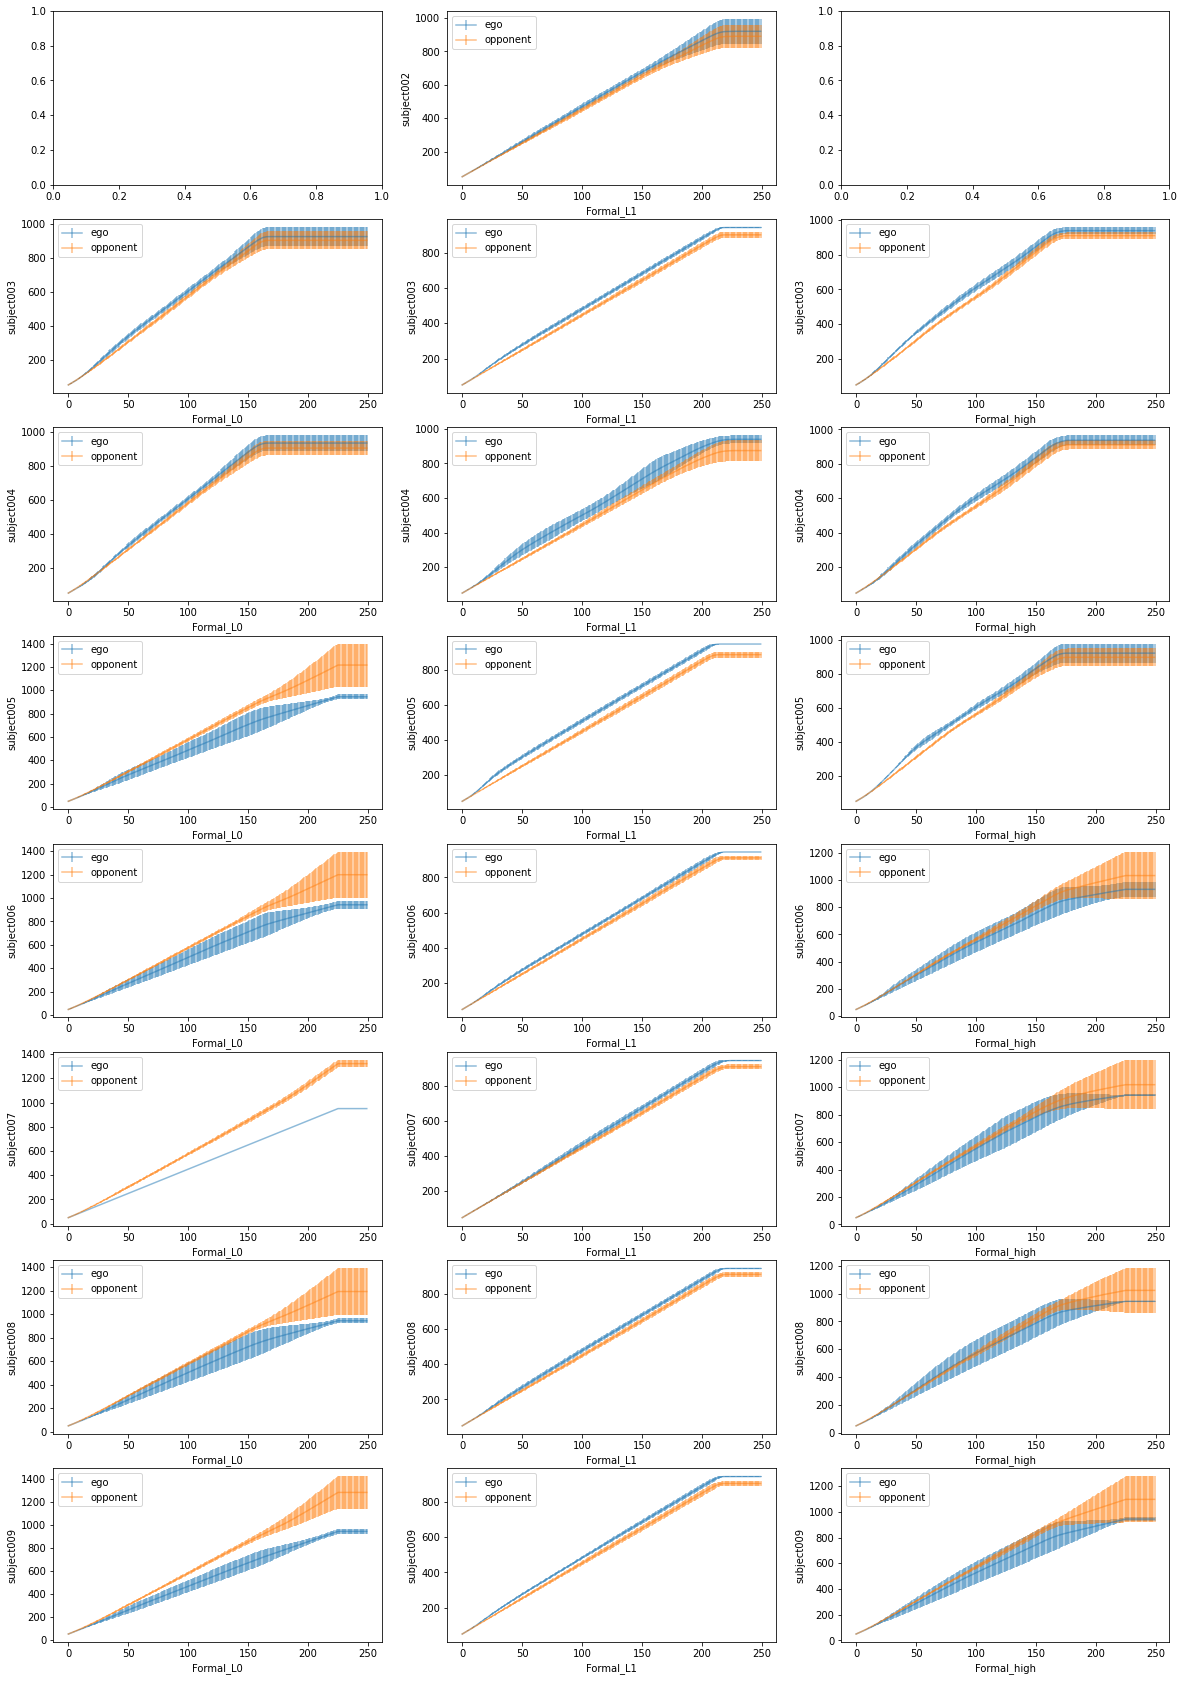

In [26]:
maxlen = 250

def plot_x_t_error_bar(player, tag, ax):    
    X1, X2 = [], []

    for timestamp in os.listdir(player):
#         print (timestamp)
        for filename in sorted(os.listdir(os.path.join(player, timestamp))):
            if filename.split(' ')[-1] != tag:
                break
#             print(filename)
            
            load_path = os.path.join(player, timestamp, filename)
            dx1, dy1, dv1, rx1, v1, dx2, dy2, dv2, rx2, v2, action1, action2, reward1, reward2 = read_csv(load_path)

            if len(rx1) > maxlen:
                X1.append(rx1[:maxlen])
            else:
                X1.append(rx1 + [rx1[-1] for _ in range(maxlen - len(rx1))])
                
            if len(rx2) > maxlen:
                X2.append(rx2[:maxlen])
            else:
                X2.append(rx2 + [rx2[-1] for _ in range(maxlen - len(rx2))])
    
    if len(X1) == 0 or len(X2) == 0:
        return
            
    X1 = 950 - np.array(X1)
    X2 = 950 - np.array(X2)

    X1_mean = X1.mean(axis=0)
    X1_std = X1.std(axis=0)
    
    X2_mean = X2.mean(axis=0)
    X2_std = X2.std(axis=0)


#     ax.title.set_text(tag + ' ' + player[7:10])

    ax.errorbar(x=np.array(range(X1.shape[1])), y=X1_mean, yerr=X1_std, fmt="-", alpha=0.5, label="ego")
    ax.errorbar(x=np.array(range(X2.shape[1])), y=X2_mean, yerr=X2_std, fmt="-", alpha=0.5, label="opponent")
    
    ax.set_xlabel(tag)
    ax.set_ylabel(player.split("_")[0])
    ax.legend()
    
# tag = "Formal_L1"
# P = "subject002_datatime"
# fig = plt.figure(figsize=(8,6))


fig, ax = plt.subplots(N_player, N_tag, figsize=(20,30))
ax

for i in range(N_player):
    player = filelist[i]
    
    for j in range(N_tag):
        tag = formal_list[j]
        print(player, tag)
        plot_x_t_error_bar(player, tag, ax[i][j])
        
# plt.legend()
# plt.savefig("./test.png")

[27.419595293738055, 20.812802295611398, 26.51495905337013] [3.5757391594737986, 1.6527418732573258, 4.467563883341756]
[27.799090021224004, 21.54385480064786, 26.349904952962792] [4.0035743592476605, 5.023022775959052, 4.548947857574759]
[21.424910863318743, 21.382940872868076, 26.197597842041265] [4.000981886059209, 3.1081621650994484, 6.445932848288185]
[21.689282416078196, 20.827666097557078, 23.256277502466375] [3.626382619713849, 1.578459191490302, 4.547274672374868]
[20.0, 20.72368608856027, 24.310550271960903] [0.0, 1.5383402378132451, 5.965177736151479]
[21.89116137890636, 20.73750636768915, 24.102036621809734] [4.0255404735130735, 1.4724918554895194, 5.501642372971551]
[20.555178831076397, 20.90599097573641, 22.553630883574485] [2.3272363626564583, 1.533813159175553, 4.144621007883353]


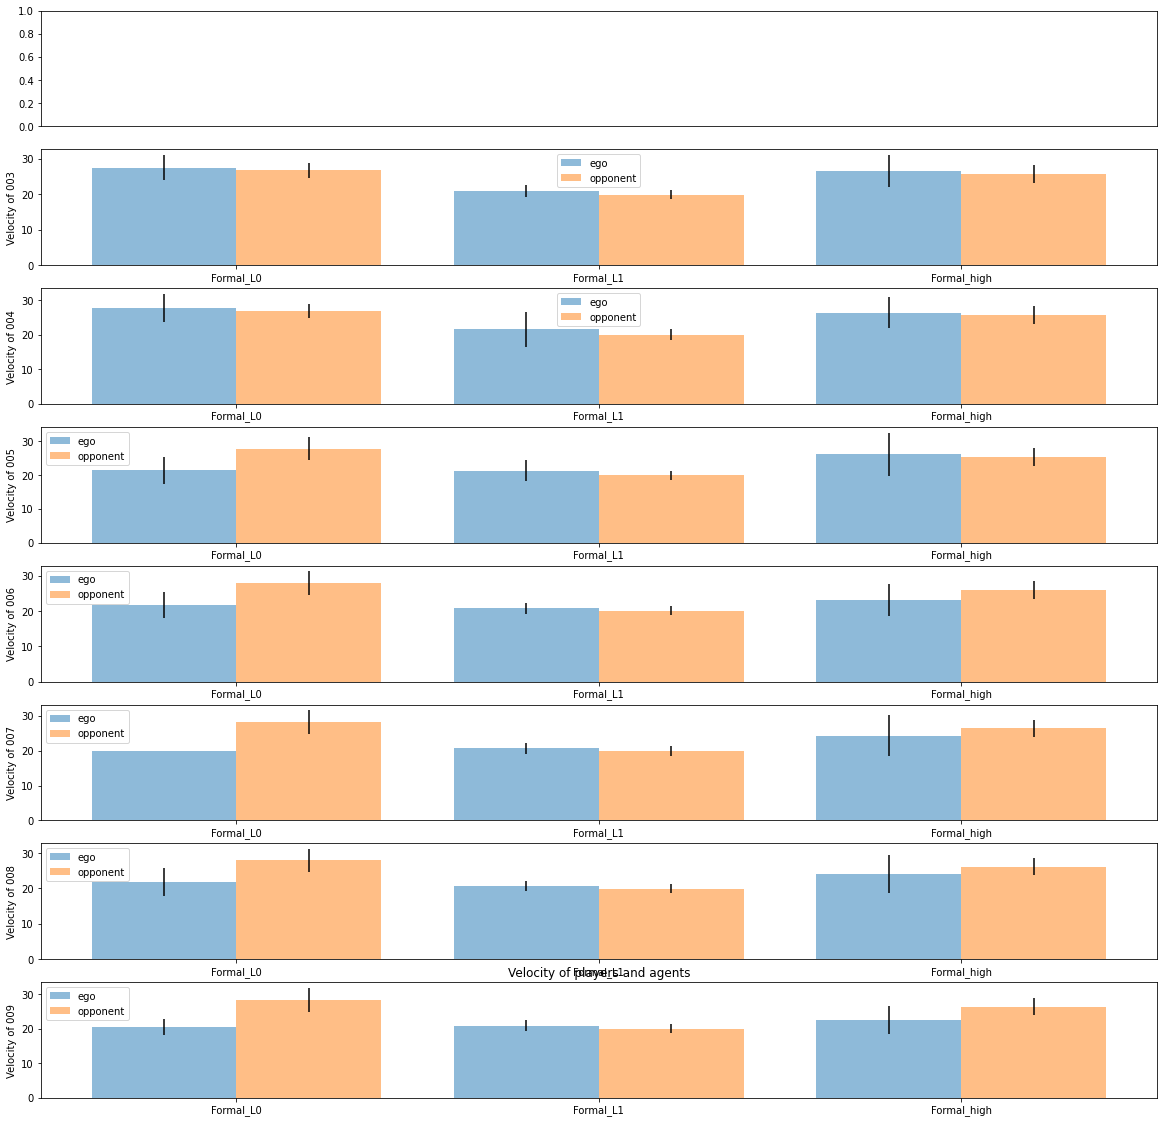

In [27]:
def plot_v_bar(player, ax):    
    V1_means, V2_means = [], []
    V1_stds, V2_stds = [], []
    xlabels = []
    
    for tag in formal_list:
        for timestamp in os.listdir(player):
            if tag != os.listdir(os.path.join(player, timestamp))[0].split(' ')[-1]:
                continue
        
            xlabels.append(tag)
            V1, V2 = [], []
            for filename in sorted(os.listdir(os.path.join(player, timestamp))):
    #             print(filename.split(' ')[-1])


                load_path = os.path.join(player, timestamp, filename)
                dx1, dy1, dv1, rx1, v1, dx2, dy2, dv2, rx2, v2, action1, action2, reward1, reward2 = read_csv(load_path)

                V1 += v1
                V2 += v2



            V1 = np.array(V1)
            V2 = np.array(V2)

            V1_means.append(V1.mean())
            V1_stds.append(V1.std())

            V2_means.append(V2.mean())
            V2_stds.append(V2.std())

    if len(V1_means) != 3 or len(V1_means) != 3:
        return []
    
#     ax.title.set_text("Velocity of " + player[7:10])
    ax.set_ylabel("Velocity of " + player[7:10])
    
    print(V1_means, V1_stds)
    ax.bar(x=[0.8, 1.8, 2.8], height=V1_means, yerr=V1_stds, width=0.4, alpha=0.5, label="ego")
    ax.bar(x=[1.2, 2.2, 3.2], height=V2_means, yerr=V2_stds, width=0.4, alpha=0.5, label="opponent")
    ax.legend()
    return xlabels


fig, ax = plt.subplots(N_player, 1, figsize=(20,20))
plt.title("Velocity of players and agents")

for i in range(N_player):
    player = filelist[i]
    xlabels = plot_v_bar(player, ax[i])
    plt.sca(ax[i])
    plt.xticks(range(1, len(xlabels) + 1), xlabels)
    
# plt.setp(ax, xticks=[1, 2, 3], xticklabels=xlabels, yticks=[1, 2, 3])
        
# plt.legend()

In [28]:
group = {"Pre_low":10, "Pre_L2":10, "Formal_L1":40, "Formal_high":40, "Formal_L0":40}
for player in filelist:
    for time in os.listdir(player):
        for filename in os.listdir(os.path.join(player, time)):
            if filename.split(' ')[-1] not in group:
                print (os.path.join(player, time, filename))
                continue
            dx1, dy1, dv1, rx1, v1, dx2, dy2, dv2, rx2, v2, action1, action2, reward1, reward2 = read_csv(os.path.join(player, time, filename))         
            t = range(len(dx1))
            if rx1[-1] > 10 and rx2[-1] > 10:
                print("collision!", t[-1], dx1[-1], dy1[-1])

collision! 148 7.518562761456963 -4.12494716063884
collision! 147 8.650437814956035 -3.514801336252276
collision! 169 8.64321564071713 -2.5758418372897722
collision! 169 8.41608814679654 -2.136652151344606
collision! 127 17.66259681787664 -0.16051011177842156
collision! 103 8.463872818353138 -2.2377431012282614
collision! 179 8.626450848777552 -1.7632687127406825
collision! 88 7.774461633075305 -4.242014434545126
collision! 127 20.041654176971676 -0.1651112370636838
collision! 132 23.417784640932453 -0.1749523094658798
collision! 132 34.11701896134541 -0.20628883367680828
collision! 129 15.256154900711948 -0.17293985977812554
collision! 93 4.327207966973901 -4.14628950084807
collision! 173 24.050721107482154 -0.18154997495003045
collision! 165 28.75395402530379 -0.1905968028549978
collision! 163 23.542552524646332 -0.18065988617308903
collision! 174 18.167440984872094 -0.1621042385668261
collision! 155 8.543586553682388 -1.2007485797621484
collision! 160 34.58169332940983 -0.2087919159

In [ ]:
reward2[-1]

In [ ]:
rx1[-1]

In [ ]:
rx1